# Overall data analysis

In [44]:
import os
from matplotlib import pyplot
import pandas as pd
import numpy as np
%matplotlib inline

os.chdir("C:/Users/Admin/Downloads")
data = pd.read_csv("./data.csv",delimiter=", ", header=0, engine='python')

def rollingAverage(n, data):
    return np.convolve(data, np.ones(n), 'valid')/n

def dailyAverage(data):
    toReturn = []
    iterations = int(len(data)/24)
    for i in range(iterations):
        toReturn.append(np.mean(data[i * 24:(i + 1) * 24 - 1]))
    return toReturn

def countingSequence(n):
    toReturn = []
    for i in range(n):
        toReturn.append(i + 1)
    return toReturn

In [25]:
data['Daily RGR'][78:len(data)]

78     0.021926
79     0.030411
80     0.022813
81     0.016823
82     0.021377
         ...   
211    0.057182
212    0.046094
213    0.068908
214    0.068514
215    0.055938
Name: Daily RGR, Length: 138, dtype: float64

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour')

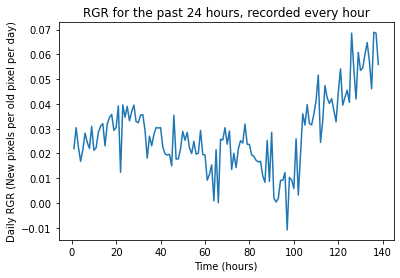

In [54]:
pyplot.plot(countingSequence(len(data[78:len(data)])), data['Daily RGR'][78:len(data)])
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 50-point rolling average')

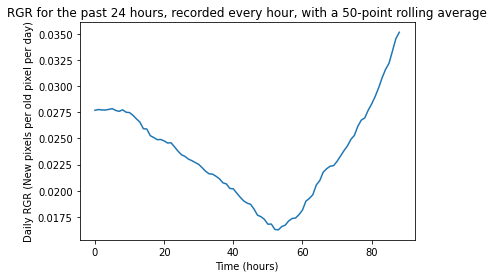

In [55]:
rollingDaily = rollingAverage(50, data['Daily RGR'][78:len(data)])
pyplot.plot(rollingDaily)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 50-point rolling average")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 3-point rolling average')

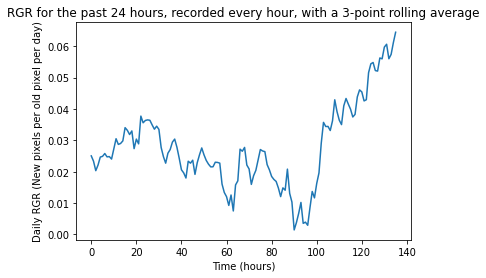

In [56]:
rolling3Hourly = rollingAverage(3, data['Daily RGR'][78:len(data)])
pyplot.plot(rolling3Hourly)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 3-point rolling average")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour and averaged every 24 hours')

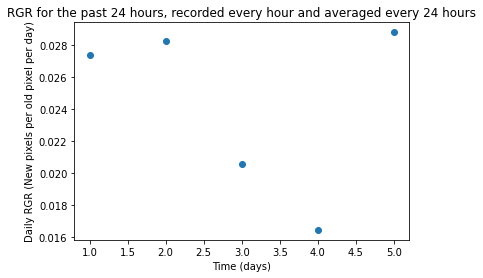

In [57]:
daily = dailyAverage(data['Daily RGR'][78:len(data)])
sequence = countingSequence(len(daily))
pyplot.scatter(sequence, daily)
pyplot.xlabel("Time (days)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour and averaged every 24 hours")